In [2]:
import DataLoader
import importlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chisquare
from scipy import stats


Number of apps: 
412


C:\Master\Thesis\IncubatorDataAnalyser\venv\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


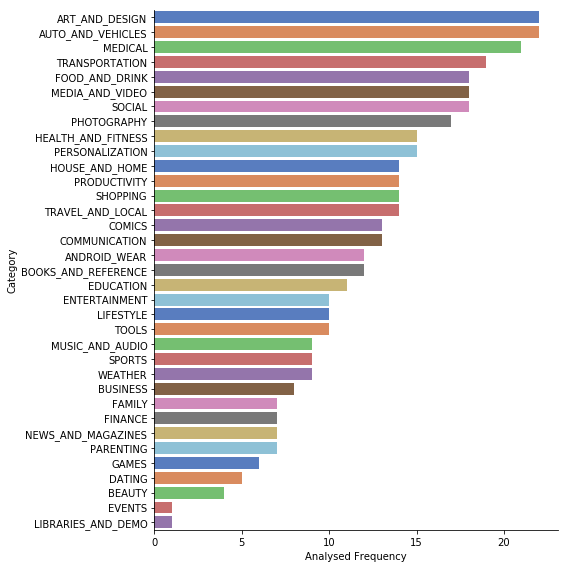

In [30]:
data = {
    'Analysed Frequency': [22, 22, 21, 19, 18, 18, 18, 17, 15, 15, 14, 14, 14, 14, 13, 13, 12, 12, 11, 10, 10, 10, 9, 9, 9, 8, 7, 7,
              7, 7, 6, 5, 4, 1, 1],
    'Category': ["ART_AND_DESIGN", "AUTO_AND_VEHICLES", "MEDICAL", "TRANSPORTATION", "FOOD_AND_DRINK",
                 "MEDIA_AND_VIDEO", "SOCIAL", "PHOTOGRAPHY", "HEALTH_AND_FITNESS", "PERSONALIZATION", "HOUSE_AND_HOME",
                 "PRODUCTIVITY", "SHOPPING", "TRAVEL_AND_LOCAL", "COMICS", "COMMUNICATION", "ANDROID_WEAR",
                 "BOOKS_AND_REFERENCE", "EDUCATION", "ENTERTAINMENT", "LIFESTYLE", "TOOLS", "MUSIC_AND_AUDIO", "SPORTS",
                 "WEATHER", "BUSINESS", "FAMILY", "FINANCE", "NEWS_AND_MAGAZINES", "PARENTING", "GAMES", "DATING",
                 "BEAUTY", "EVENTS", "LIBRARIES_AND_DEMO"]}
df = pd.DataFrame(data=data)
# df = df.set_index("Category")
# sns.barplot(y="Category", x="Analysed_Freq", data=df, palette="muted")
# sns.factorplot(y="Category", x="Analysed_Freq", data=df, kind="bar", palette="muted", scale=1, size=10)
sns.catplot(y="Category", x="Analysed Frequency", data=df, kind="bar", palette="muted", size=8)
plt.savefig("./data/barplot-categories.pdf", dpi=1200)

In [4]:
distribution = {
    'Dataset_Freq': [500, 500, 500, 498, 498, 497, 497, 496, 495, 495, 494, 493, 493, 492, 492, 491, 491, 490, 488, 486, 485,
              484, 484, 483, 481, 480, 471, 444, 418, 292, 247, 185, 137, 95, 52],
    'Category': ["ANDROID_WEAR", "COMICS", "EDUCATION", "ENTERTAINMENT", "FOOD_AND_DRINK", "MEDICAL", "PERSONALIZATION",
                 "PHOTOGRAPHY", "BOOKS_AND_REFERENCE", "BUSINESS", "LIFESTYLE", "AUTO_AND_VEHICLES", "FINANCE",
                 "ART_AND_DESIGN", "TRANSPORTATION", "NEWS_AND_MAGAZINES", "SOCIAL", "TOOLS", "SPORTS",
                 "MEDIA_AND_VIDEO", "MUSIC_AND_AUDIO", "SHOPPING", "WEATHER", "PRODUCTIVITY", "TRAVEL_AND_LOCAL",
                 "HEALTH_AND_FITNESS", "COMMUNICATION", "GAMES", "FAMILY", "HOUSE_AND_HOME", "DATING", "PARENTING",
                 "LIBRARIES_AND_DEMO", "BEAUTY", "EVENTS"]}
dist_df = pd.DataFrame(data=distribution)
dist_df = dist_df.set_index("Category")
dist_df.head()

,Dataset_Freq
Category,
ANDROID_WEAR,500
COMICS,500
EDUCATION,500
ENTERTAINMENT,498
FOOD_AND_DRINK,498


In [5]:
joined_df = df.join(dist_df)
# joined_df.Dataset_Freq.apply(lambda x: 100* x / x.sum())
joined_df["Dataset_distribution"] = joined_df.Dataset_Freq / joined_df.Dataset_Freq.sum() * 100
joined_df["Expected_Freq"] = joined_df.Dataset_distribution * joined_df.Analysed_Freq.sum() / 100
joined_df.to_latex()

'\\begin{tabular}{lrrrr}\n\\toprule\n{} &  Analysed\\_Freq &  Dataset\\_Freq &  Dataset\\_distribution &  Expected\\_Freq \\\\\nCategory            &                &               &                       &                \\\\\n\\midrule\nART\\_AND\\_DESIGN      &             22 &           492 &              3.253108 &      13.402803 \\\\\nAUTO\\_AND\\_VEHICLES   &             22 &           493 &              3.259720 &      13.430045 \\\\\nMEDICAL             &             21 &           497 &              3.286168 &      13.539011 \\\\\nTRANSPORTATION      &             19 &           492 &              3.253108 &      13.402803 \\\\\nFOOD\\_AND\\_DRINK      &             18 &           498 &              3.292780 &      13.566252 \\\\\nMEDIA\\_AND\\_VIDEO     &             18 &           486 &              3.213436 &      13.239355 \\\\\nSOCIAL              &             18 &           491 &              3.246496 &      13.375562 \\\\\nPHOTOGRAPHY         &             17 &       

In [70]:
chisquare(f_obs=joined_df.Analysed_Freq, f_exp=joined_df.Expected_Freq)

Power_divergenceResult(statistic=53.11792434794446, pvalue=0.019468630749128208)

In [52]:
chisquare(f_obs=[1, 19, 5], f_exp=[10, 10, 10])

Power_divergenceResult(statistic=18.7, pvalue=8.69654190944029e-05)